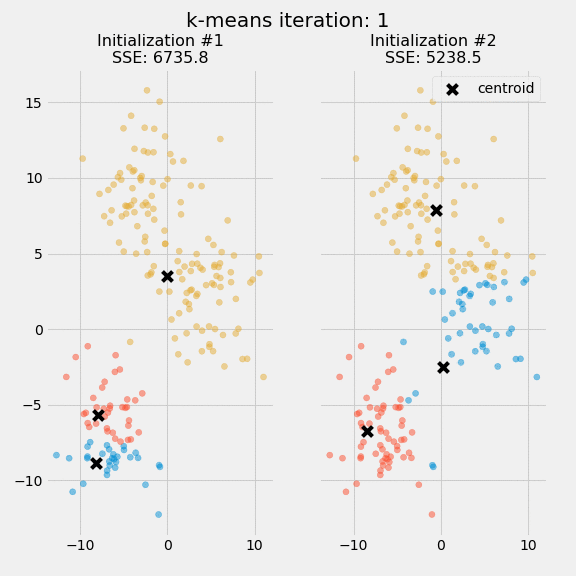

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(iris_df)

KMeans(init='random', max_iter=100, n_clusters=4)

In [10]:
kmeans.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.23658537, 2.85853659, 4.80731707, 1.62195122],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852]])

In [11]:
kmeans.n_iter_

8

In [12]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(iris_df)
kmeans1 = KMeans(init="k-means++",n_clusters=2,n_init=10,max_iter=100)
label = kmeans1.fit_predict(df)

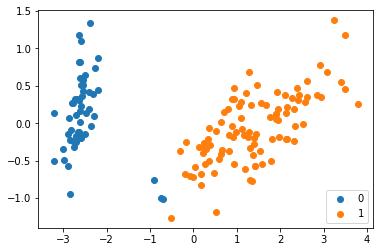

In [15]:
u_labels = np.unique(label)
 
#Visualization
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

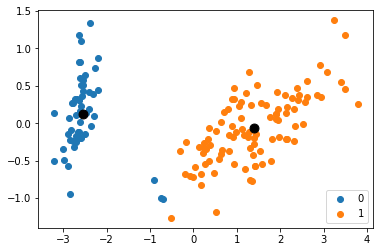

In [16]:
centroids = kmeans1.cluster_centers_
u_labels = np.unique(label)
 

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

Now, have a look at a method that is commonly used to evaluate the appropriate number of clusters:

1) The elbow method

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

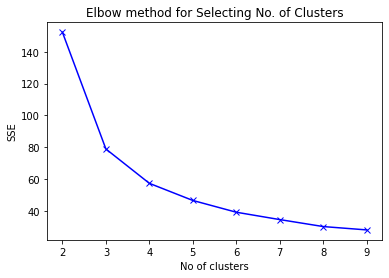

In [17]:
SSE =[]
for i in range(2, 10):
    kmeans = KMeans(init="k-means++",n_clusters=i,n_init=10,max_iter=100)
    kmeans.fit(iris_df)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2, 10), SSE, 'bx-')
plt.title('Elbow method for Selecting No. of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()